# Multi-class Dog Breed Classification

The aim of this project is to build a Multi-class Dog Breed Identification Machine Learning Model using `Tensorflow` and `Tenserflow Hub`.
* We'll use `pandas`, `numpy`, `matplotlib` and `seaborn` for Data analysis, manipulation and Visualization.

* The data we're using is from Kaggle's dog breed identification competition. https://www.kaggle.com/c/dog-breed-identification/data

* We're dealing with images (unstructured data) so it's best we use deep learning/transfer learning.

* There are total 120 breeds of dogs in the Training Dataset.

* There are around 10,000+ images in the training set.

* There are around 10,000+ images in the test set (these images have no labels, because we've to predict them).

### Importing the required packages.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
print(tf.__version__)
print(hub.__version__)

2.15.0
0.16.1


### Importing our Labels data.

In [ ]:
labels =  pd.read_csv("drive/MyDrive/Dog Breed Classification Data/labels.csv")

In [ ]:
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


### Checking some Information of our Data.

In [ ]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


### Checking for any Missing labels in our Data.

In [ ]:
labels.isna().sum()

id       0
breed    0
dtype: int64

**Looking at all the Breeds in our Lables Data.**

In [ ]:
labels["breed"].value_counts()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
komondor                 67
brabancon_griffon        67
eskimo_dog               66
briard                   66
Name: count, Length: 120, dtype: int64

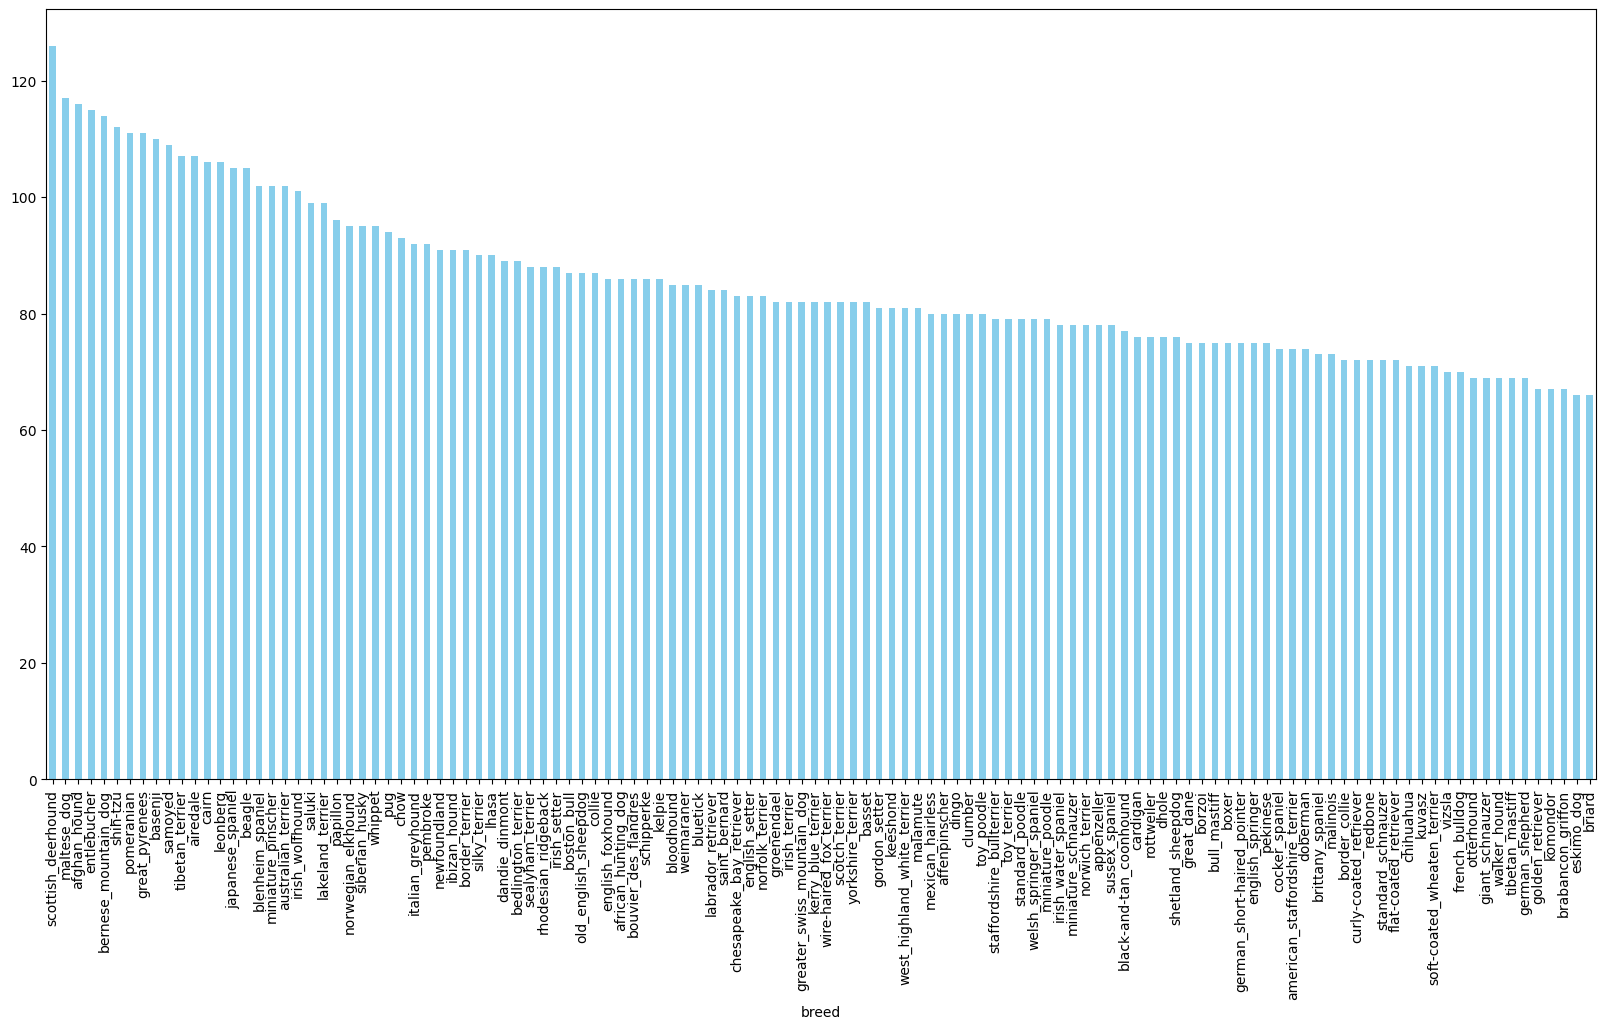

In [ ]:
labels["breed"].value_counts().plot(kind="bar", figsize=(20, 10), color="skyblue");

### Checking all the unique breeds in the data.

In [ ]:
labels["breed"].unique()

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog', 'walker_hound', 'maltese_dog',
       'norfolk_terrier', 'african_hunting_dog',
       'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer',
       'doberman', 'otterhound', 'standard_schnauzer',
       'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn',
       'affenpinscher', 'labrador_retriever', 'ibizan_hound',
       'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael',
       'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier',
       'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz',
       'german_shepherd', 'greater_swiss_mountain_dog', 'basset',
       'australian_terrier', 'schipperke', 'rhodesian_ridgeback',
       'irish_setter', 'appenzeller', 'bloodhound', 'samoyed',
       'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon',
       'borde

## Converting the `id` to `filenames` to access the images.

In [ ]:
filenames = [f"drive/MyDrive/Dog Breed Classification Data/train/{fname}.jpg" for fname in labels["id"]]

In [ ]:
filenames[:10]

['drive/MyDrive/Dog Breed Classification Data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Breed Classification Data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Breed Classification Data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Breed Classification Data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Breed Classification Data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Breed Classification Data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Breed Classification Data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Breed Classification Data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Breed Classification Data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Breed Classification Data/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

## Separating the `breeds` column data.

In [ ]:
breeds = labels["breed"]

In [ ]:
breeds[:10]

0           boston_bull
1                 dingo
2              pekinese
3              bluetick
4      golden_retriever
5    bedlington_terrier
6    bedlington_terrier
7                borzoi
8               basenji
9    scottish_deerhound
Name: breed, dtype: object

## Getting all the unique breeds.

In [ ]:
all_breeds = breeds.unique()
all_breeds

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog', 'walker_hound', 'maltese_dog',
       'norfolk_terrier', 'african_hunting_dog',
       'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer',
       'doberman', 'otterhound', 'standard_schnauzer',
       'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn',
       'affenpinscher', 'labrador_retriever', 'ibizan_hound',
       'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael',
       'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier',
       'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz',
       'german_shepherd', 'greater_swiss_mountain_dog', 'basset',
       'australian_terrier', 'schipperke', 'rhodesian_ridgeback',
       'irish_setter', 'appenzeller', 'bloodhound', 'samoyed',
       'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon',
       'borde

# Getting Our Data Ready for Training the Model.

### Converting the labels into boolean arrays.

In [ ]:
bool_labels = [breed == all_breeds for breed in breeds]

In [ ]:
bool_labels[:2]

[array([ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False,  True, False, False, False, Fal

### Converting boolean arrays into integers.

In [ ]:
bool_labels = [label.astype(int) for label in bool_labels]

In [ ]:
len(bool_labels)

10222

## Creating our Datasets

In [ ]:
X = filenames
y = bool_labels

## Processing Images: Conveting into Tensors and resizing the height & width

In [ ]:
def process_image(image_path):
  """
  Takes parameters as filepath and convert into tensors.
  """
  image = tf.io.read_file(image_path)

  image = tf.image.decode_jpeg(image, channels=3)

  image = tf.image.convert_image_dtype(image, tf.float32)

  image = tf.image.resize(image, [224, 224])

  return image

### Checking the images in dataset.

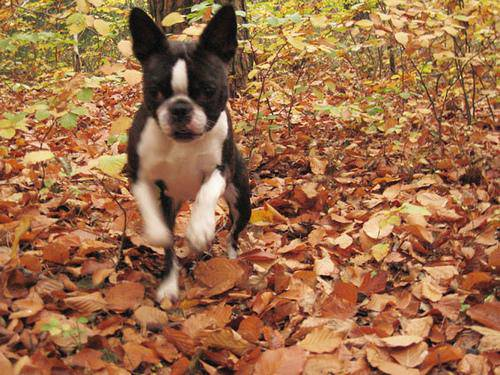

In [ ]:
from IPython.display import Image

Image(X[0])

## Splitting our Data into Training and Test Splits.

### First We'll train our model with only 1000 Samples to check if everything is working fine.

In [ ]:
from sklearn.model_selection import train_test_split

SAMPLE_SIZE = 1000

X_train, X_test, y_train, y_test = train_test_split(X[:SAMPLE_SIZE], y[:SAMPLE_SIZE], test_size=0.2)

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [ ]:
def get_image_label(filepath, label):

  return process_image(filepath), label

### Converting Data into Data-Batches for better performance and optimization.

In [ ]:
def create_data_batches(X, y=None, test_data=False, val_data=False, batch_size=32):
  if test_data:
    data = tf.data.Dataset.from_tensor_slices(tf.constant(X))
    data = data.map(process_image).batch(batch_size)
    return data
  elif val_data:
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data = data.map(get_image_label).batch(batch_size)
    return data;
  else:
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data = data.map(get_image_label).batch(batch_size)
    return data

In [ ]:
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_test, y_test, val_data=True)

In [ ]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.int32, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.int32, name=None)))

### Checking the Data in Data-batches.

In [ ]:
def show_images(images, label):
  plt.figure(figsize=(10, 10))
  for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.title(all_breeds[label[i].argmax()])
    plt.axis("off")

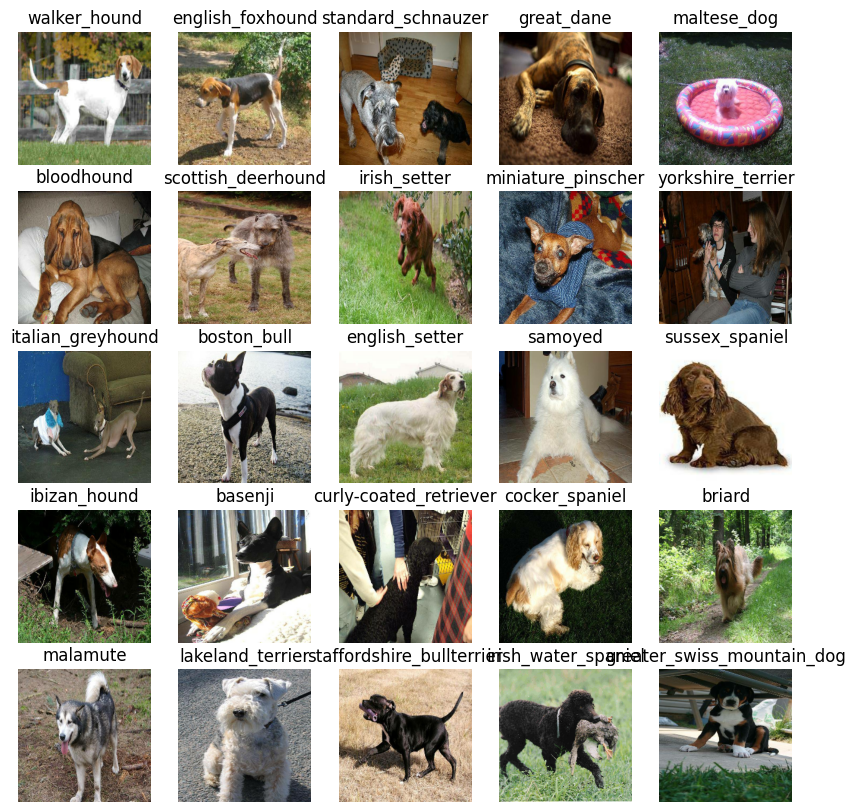

In [ ]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_images(train_images, train_labels)

### Defining the `INPUT_SHAPE`, `OUTPUT_SHAPE` and `url` for our model.

In [ ]:
INPUT_SHAPE = [None, 224, 224, 3]

OUTPUT_SHAPE = len(all_breeds)

MODEL_URL = "https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1"

### Function to create and return the Model.

In [ ]:
def create_model():
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL),
      tf.keras.layers.Dense(units=OUTPUT_SHAPE, activation="softmax")
  ])
  model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
  model.build(INPUT_SHAPE)
  return model


### Creating and checking the model summary.

In [ ]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


### Defining Callbacks for Tensorboard and Early Stopping.

In [ ]:
%load_ext tensorboard
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3)
tensor_board = tf.keras.callbacks.TensorBoard("drive/MyDrive/Dog Breed Classification Data/logs/")


In [ ]:
NUM_EPOCHS = 100

## Fitting our Model with the Training data.

In [ ]:
model.fit(x=train_data,
          epochs=NUM_EPOCHS,
          validation_data=val_data,
          callbacks=[tensor_board, early_stopping])

Epoch 1/100
25/25 [==============================] - 247s 10s/step - loss: 4.5675 - accuracy: 0.0913 - val_loss: 3.2514 - val_accuracy: 0.2600
Epoch 2/100
25/25 [==============================] - 5s 187ms/step - loss: 1.5353 - accuracy: 0.7188 - val_loss: 1.9967 - val_accuracy: 0.5150
Epoch 3/100
25/25 [==============================] - 3s 138ms/step - loss: 0.5319 - accuracy: 0.9450 - val_loss: 1.5327 - val_accuracy: 0.6200
Epoch 4/100
25/25 [==============================] - 4s 163ms/step - loss: 0.2417 - accuracy: 0.9900 - val_loss: 1.3660 - val_accuracy: 0.6550
Epoch 5/100
25/25 [==============================] - 5s 181ms/step - loss: 0.1436 - accuracy: 0.9987 - val_loss: 1.2914 - val_accuracy: 0.6650
Epoch 6/100
25/25 [==============================] - 4s 168ms/step - loss: 0.0990 - accuracy: 1.0000 - val_loss: 1.2456 - val_accuracy: 0.6700
Epoch 7/100
25/25 [==============================] - 4s 167ms/step - loss: 0.0745 - accuracy: 1.0000 - val_loss: 1.2122 - val_accuracy: 0.6700

## Getting the Predictions on our Validation Data.

In [ ]:
predictions = model.predict(val_data, verbose=1)

7/7 [==============================] - 1s 104ms/step


In [ ]:
predictions

array([[9.34581995e-01, 1.00805220e-04, 8.44793176e-05, ...,
        9.99466574e-05, 1.15650495e-04, 1.96741148e-05],
       [2.41485577e-05, 1.17143554e-05, 1.29565725e-03, ...,
        2.75579980e-04, 1.98275055e-04, 9.45978245e-05],
       [6.88017462e-05, 1.60904470e-04, 9.31740669e-06, ...,
        2.86401901e-05, 8.87596525e-06, 1.16813299e-05],
       ...,
       [2.08672136e-04, 5.72496901e-06, 5.41521586e-04, ...,
        1.91839717e-05, 7.88395933e-04, 1.07960805e-05],
       [1.99978953e-04, 2.44981857e-05, 1.97598638e-04, ...,
        1.72504981e-04, 6.55132055e-04, 1.47542043e-04],
       [6.26531328e-05, 8.08788871e-04, 1.10035296e-06, ...,
        4.65916819e-04, 1.55404559e-05, 1.31174265e-05]], dtype=float32)

In [ ]:
predictions.shape

(200, 120)

# Now Training our Model with full data (10000+) Images.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(8177, 8177, 2045, 2045)

In [ ]:
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_test, y_test, val_data=True)

In [ ]:
model.fit(x=train_data,
          epochs=NUM_EPOCHS,
          validation_data=val_data,
          callbacks=[tensor_board, early_stopping])

Epoch 1/100
256/256 [==============================] - 2352s 9s/step - loss: 0.8062 - accuracy: 0.7656 - val_loss: 0.6903 - val_accuracy: 0.7971
Epoch 2/100
256/256 [==============================] - 44s 171ms/step - loss: 0.2561 - accuracy: 0.9298 - val_loss: 0.6801 - val_accuracy: 0.7995
Epoch 3/100
256/256 [==============================] - 45s 175ms/step - loss: 0.1376 - accuracy: 0.9721 - val_loss: 0.6860 - val_accuracy: 0.8078
Epoch 4/100
256/256 [==============================] - 43s 167ms/step - loss: 0.0891 - accuracy: 0.9870 - val_loss: 0.6887 - val_accuracy: 0.8029
Epoch 5/100
256/256 [==============================] - 44s 173ms/step - loss: 0.0638 - accuracy: 0.9929 - val_loss: 0.6969 - val_accuracy: 0.7990
Epoch 6/100
256/256 [==============================] - 44s 171ms/step - loss: 0.0490 - accuracy: 0.9955 - val_loss: 0.7074 - val_accuracy: 0.8039


## Getting the predictions on validation data.

In [ ]:
predictions = model.predict(val_data, verbose=1)

64/64 [==============================] - 10s 160ms/step


### Saving the model to local storage.

In [ ]:
model.save("drive/MyDrive/Dog Breed Classification Data/Full-Trained-MultiClass-Dog-Breed-MobilenetV2.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save("drive/MyDrive/Dog Breed Classification Data/Full-Trained-MultiClass-Dog-Breed-MobilenetV2.keras")

In [ ]:
len(predictions)

2045

In [ ]:
predictions.shape

(2045, 120)

In [ ]:
predictions[:2]

array([[7.01344716e-09, 7.81604115e-09, 2.00248422e-07, 1.62375557e-10,
        2.60509637e-06, 2.19858975e-09, 8.84168458e-06, 8.09972256e-10,
        1.07439774e-07, 3.26051406e-07, 2.20126054e-07, 8.58746763e-09,
        5.21925303e-09, 1.80260085e-09, 8.51236637e-10, 4.37504156e-07,
        1.59717961e-10, 8.62226202e-09, 4.24739284e-07, 2.79593717e-08,
        2.24592910e-07, 1.05798492e-07, 1.60973187e-07, 1.69423975e-09,
        8.61037519e-10, 3.76627938e-08, 1.31890909e-09, 8.10409256e-05,
        1.77988557e-08, 5.30217505e-08, 5.15869552e-08, 4.73987534e-08,
        4.64023819e-10, 7.73389630e-10, 4.58501681e-09, 9.48561052e-09,
        4.41338965e-09, 2.04654270e-06, 4.97931794e-08, 3.25406972e-08,
        2.59425192e-08, 2.69653921e-09, 3.97960029e-08, 2.12086686e-08,
        2.00374117e-07, 9.98482764e-01, 3.63694652e-09, 4.47426522e-08,
        4.85312457e-10, 2.97780559e-07, 2.01478520e-06, 1.03757507e-07,
        2.51973660e-07, 4.27585462e-07, 1.16876127e-08, 2.357340

In [ ]:
np.argmax(predictions[0])

45

In [ ]:
all_breeds[np.argmax(predictions[0])], all_breeds[np.argmax(y_test[0])]

('irish_setter', 'irish_setter')

In [ ]:
def get_results(index):
  return all_breeds[np.argmax(predictions[index])], all_breeds[np.argmax(y_test[index])]

### Comparing the Predicted Labesl to actual labels and the Accuracy of Model.

In [ ]:
result = []
for i in range(len(predictions)):
  result.append(get_results(i))

In [ ]:
result

[('irish_setter', 'irish_setter'),
 ('norwegian_elkhound', 'norwegian_elkhound'),
 ('norfolk_terrier', 'norfolk_terrier'),
 ('dingo', 'dhole'),
 ('african_hunting_dog', 'african_hunting_dog'),
 ('beagle', 'beagle'),
 ('standard_poodle', 'toy_poodle'),
 ('boxer', 'boxer'),
 ('samoyed', 'samoyed'),
 ('pug', 'pug'),
 ('schipperke', 'schipperke'),
 ('rhodesian_ridgeback', 'chesapeake_bay_retriever'),
 ('standard_poodle', 'standard_poodle'),
 ('staffordshire_bullterrier', 'french_bulldog'),
 ('australian_terrier', 'yorkshire_terrier'),
 ('wire-haired_fox_terrier', 'airedale'),
 ('siberian_husky', 'malamute'),
 ('brabancon_griffon', 'brabancon_griffon'),
 ('collie', 'collie'),
 ('chow', 'chow'),
 ('japanese_spaniel', 'japanese_spaniel'),
 ('bernese_mountain_dog', 'bernese_mountain_dog'),
 ('wire-haired_fox_terrier', 'wire-haired_fox_terrier'),
 ('golden_retriever', 'golden_retriever'),
 ('basset', 'basset'),
 ('cocker_spaniel', 'cocker_spaniel'),
 ('sealyham_terrier', 'sealyham_terrier'),
 (

In [ ]:
true_res = 0
false_res = 0
for item in result:
  if item[0] == item[1]:
    true_res += 1
  else:
    false_res += 1

In [ ]:
true_res, false_res

(1644, 401)

# As per the Evaluation, Our Model is capable in successfully predicting the Dog Breeds in our data with a Accuracy of 80.05%